In [139]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from pylab import rcParams
import urllib
import sklearn
from sklearn.linear_model import RidgeCV, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

In [32]:
np.median(df['price'])
df['price'].describe()

count    2.159500e+04
mean     5.402929e+05
std      3.673845e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [4]:
houses_under_500k = df.loc[df['price'] <= 500000]

In [5]:
houses_under_500k

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,0.0,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0,3.0,0.0,2.0
6,257500.0,3,2.25,1715,6819,2.0,1715,1995,0.0,98003,47.3097,-122.327,2238,6819,0,4.0,0.0,2.0
7,291850.0,3,1.50,1060,9711,1.0,1060,1963,0.0,98198,47.4095,-122.315,1650,9711,0,4.0,0.0,2.0
8,229500.0,3,1.00,1780,7470,1.0,1050,1960,0.0,98146,47.5123,-122.337,1780,8113,730,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,360000.0,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0,5.0,0.0,2.0
21591,400000.0,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0,5.0,0.0,2.0
21592,402101.0,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0,4.0,0.0,2.0
21593,400000.0,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0,5.0,0.0,2.0


In [7]:
above_500k = df.loc[df['price'] > 500000]

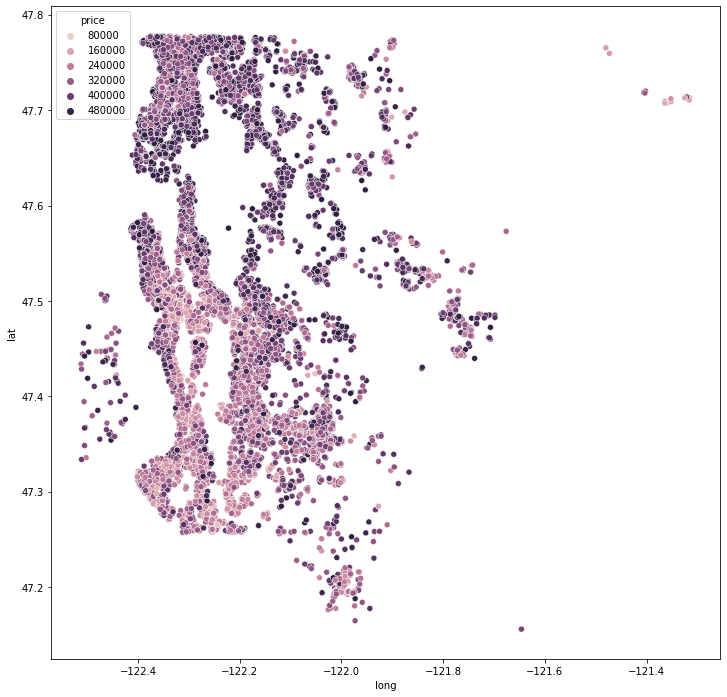

In [6]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=houses_under_500k,
               hue='price');

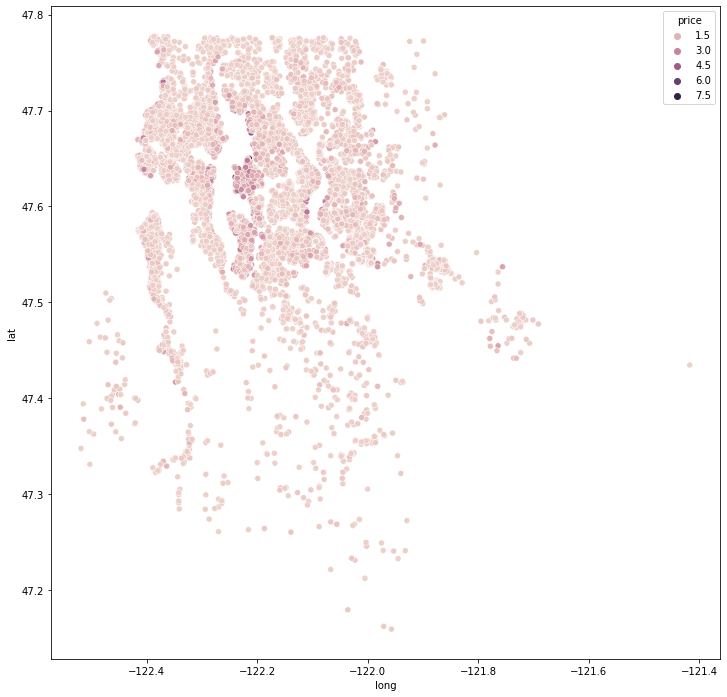

In [9]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=above_500k,
               hue='price',
               cmap='Oranges');

In [10]:
houses_under_500k['sqft_living'].describe()

count    12546.000000
mean      1668.947952
std        583.508820
min        370.000000
25%       1240.000000
50%       1600.000000
75%       2030.000000
max       5067.000000
Name: sqft_living, dtype: float64

In [11]:
above_500k['sqft_living'].describe()

count     9049.000000
mean      2650.621063
std        989.836522
min        680.000000
25%       1960.000000
50%       2520.000000
75%       3180.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [12]:
houses_under_500k['grades'].describe()

count    12546.000000
mean         4.113263
std          0.792555
min          0.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: grades, dtype: float64

In [13]:
above_500k['grades'].describe()

count    9049.000000
mean        5.413195
std         1.196816
min         2.000000
25%         5.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: grades, dtype: float64

In [18]:
houses_under_500k['zipcode'].value_counts().nlargest(10)

98042    523
98038    519
98023    477
98133    441
98058    420
98118    395
98034    382
98155    365
98001    347
98092    326
Name: zipcode, dtype: int64

In [17]:
#top value counts for above 500k, this tells us 80% of those houses in this zipcode are above ~500k
len(houses_under_500k.loc[houses_under_500k['zipcode'] == 98052])

139

In [19]:
above_500k['zipcode'].value_counts().nlargest(10)

98052    435
98006    420
98115    376
98103    365
98074    355
98075    340
98033    339
98117    334
98004    316
98053    291
Name: zipcode, dtype: int64

In [14]:
houses_under_500k.loc[houses_under_500k['grades'] >= 7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
769,405000.0,3,2.50,3170,12750,2.0,2360,1995,0.0,98023,47.3384,-122.336,2970,13125,810,7.0,0.0,2.0
1218,475000.0,4,3.50,3660,14401,2.0,2660,1994,0.0,98023,47.3076,-122.396,2780,10653,1000,7.0,0.0,2.0
1980,402500.0,4,2.50,2600,11951,2.0,2600,1988,0.0,98023,47.3053,-122.340,2820,12093,0,7.0,0.0,2.0
3771,472500.0,4,2.50,2960,223462,2.0,2960,2001,0.0,98030,47.3646,-122.211,2770,16482,0,7.0,0.0,2.0
5388,425000.0,3,2.50,2670,13218,1.0,2670,1988,0.0,98042,47.3683,-122.153,1960,13130,0,7.0,0.0,3.0
6140,420000.0,4,2.50,2480,8626,2.0,2480,2001,0.0,98001,47.3185,-122.262,2990,9033,0,7.0,0.0,2.0
6283,490000.0,4,2.50,3020,8302,2.0,3020,1994,0.0,98042,47.3630,-122.127,3020,8406,0,7.0,0.0,3.0
6899,465000.0,3,2.50,2870,25663,2.0,2870,1988,0.0,98003,47.2769,-122.333,2950,24347,0,7.0,0.0,2.0
7147,475000.0,4,2.50,3740,8700,1.0,2260,2004,0.0,98058,47.4587,-122.117,2650,6333,1480,7.0,0.0,2.0
7378,450000.0,3,2.50,1990,3478,2.0,1520,1990,0.0,98199,47.6361,-122.399,1710,6157,470,7.0,0.0,2.0


In [20]:
houses_under_500k.loc[houses_under_500k['grades'] >= 7]

33

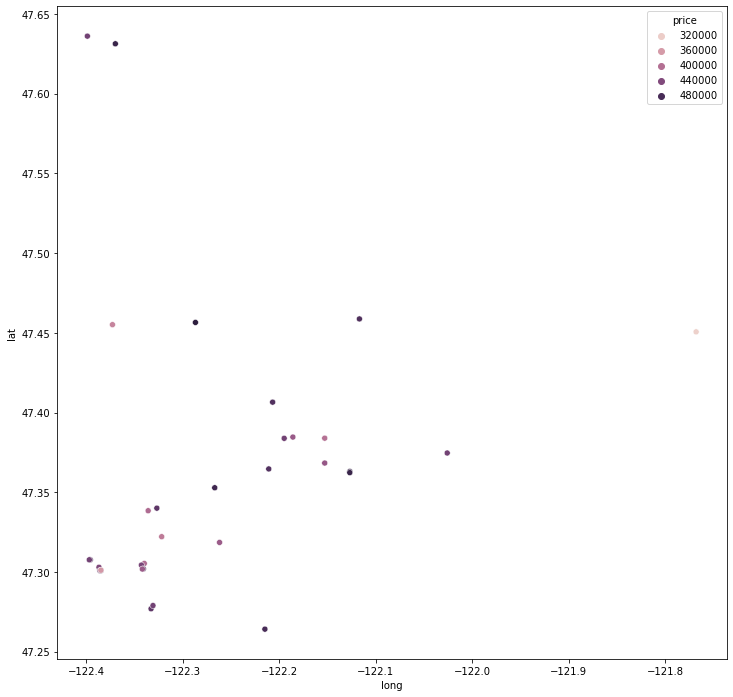

In [21]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=houses_under_500k.loc[houses_under_500k['grades'] >= 7],
               hue='price');

In [23]:
above_500k.loc[above_500k['grades'] < 7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,4.0,0.0,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,5.0,0.0,2.0
10,662500.0,3,2.50,3560,9796,1.0,1860,1965,0.0,98007,47.6007,-122.145,2210,8925,1700,5.0,0.0,2.0
14,530000.0,5,2.00,1810,4850,1.5,1810,1900,0.0,98107,47.6700,-122.394,1360,4850,0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,541800.0,4,2.50,3118,7866,2.0,3118,2014,0.0,98001,47.2931,-122.264,2673,6500,0,6.0,0.0,2.0
21581,810000.0,4,3.00,3990,7838,2.0,3990,2003,0.0,98053,47.6857,-122.046,3370,6814,0,6.0,0.0,2.0
21585,507250.0,3,2.50,2270,5536,2.0,2270,2003,0.0,98065,47.5389,-121.881,2270,5731,0,5.0,0.0,2.0
21587,610685.0,4,2.50,2520,6023,2.0,2520,2014,0.0,98056,47.5137,-122.167,2520,6023,0,6.0,0.0,2.0


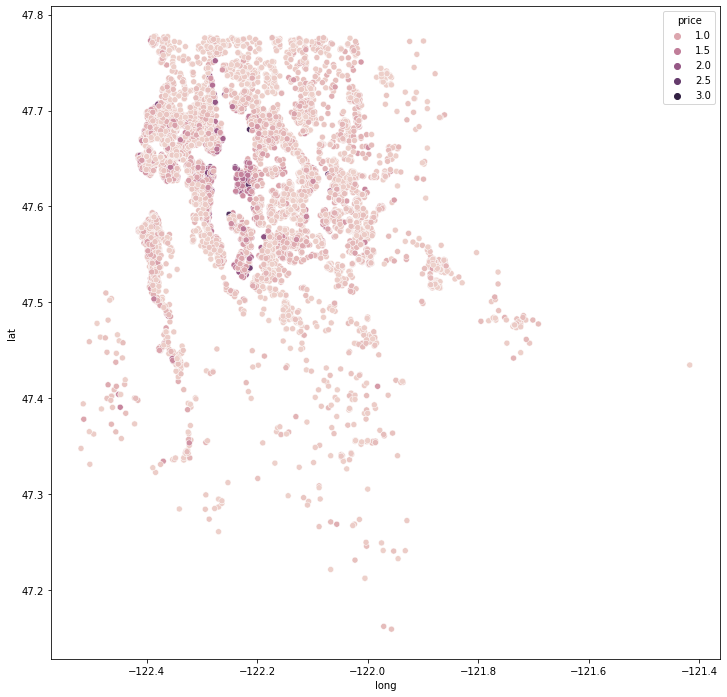

In [24]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=above_500k.loc[above_500k['grades'] < 7],
               hue='price');

In [27]:
houses_under_500k.loc[houses_under_500k['sqft_living'] > 2000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
22,285000.0,5,2.50,2270,6300,2.0,2270,1995,0.0,98092,47.3266,-122.169,2240,7005,0,5.0,0.0,2.0
24,329000.0,3,2.25,2450,6500,2.0,2450,1985,0.0,98030,47.3739,-122.172,2200,6865,0,5.0,0.0,3.0
34,322500.0,4,2.75,2060,6659,1.0,1280,1981,0.0,98058,47.4276,-122.157,2020,8720,780,4.0,0.0,2.0
45,488000.0,3,2.50,3160,13603,2.0,3160,2003,0.0,98019,47.7443,-121.977,3050,9232,0,5.0,0.0,2.0
51,345000.0,5,2.50,3150,9134,1.0,1640,1966,0.0,98056,47.4934,-122.189,1990,9133,1510,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21547,341780.0,4,2.75,2260,4440,2.0,2260,2014,0.0,98001,47.3507,-122.291,2260,4563,0,4.0,0.0,2.0
21557,399950.0,3,2.50,3087,5002,2.0,3087,2014,0.0,98023,47.2974,-122.349,2927,5183,0,5.0,0.0,2.0
21571,347500.0,3,2.50,2540,4760,2.0,2540,2010,0.0,98038,47.3452,-122.022,2540,4571,0,5.0,0.0,2.0
21576,350000.0,4,2.75,2500,5995,2.0,2500,2008,0.0,98042,47.3749,-122.107,2530,5988,0,5.0,0.0,2.0


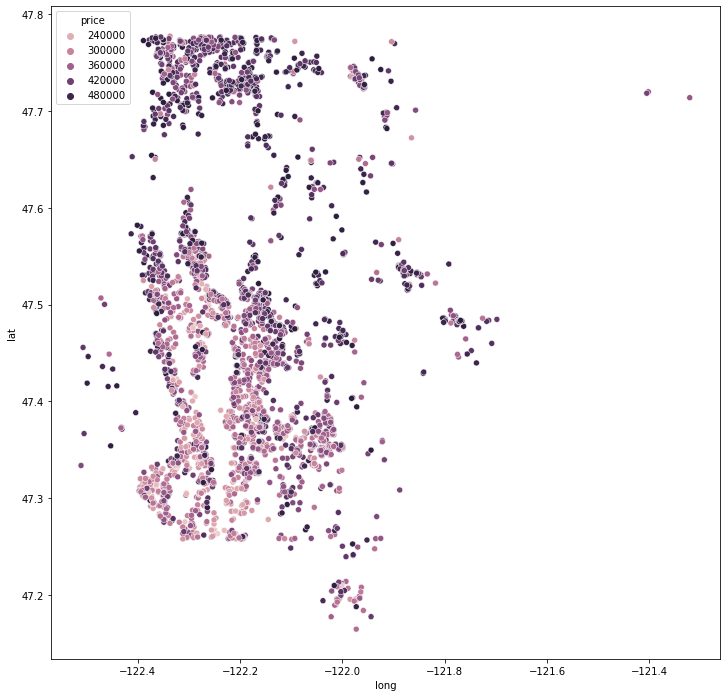

In [28]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=houses_under_500k.loc[houses_under_500k['sqft_living'] > 2000],
               hue='price');

In [125]:
#target_df = df[df['price'].between(450000, 650000)]
target_df = df.loc[df['price'] >= 800000]

In [126]:
target_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
5,1230000.0,4,4.50,5420,101930,1.0,3890,2001,0.0,98053,47.6561,-122.005,4760,101930,1530,8.0,0.0,2.0
21,2000000.0,3,2.75,3050,44867,1.0,2330,1968,0.0,98040,47.5316,-122.233,4110,20336,720,6.0,0.0,2.0
26,937000.0,3,1.75,2450,2691,2.0,1750,1915,0.0,98119,47.6386,-122.360,1760,3573,700,5.0,0.0,2.0
42,861990.0,5,2.75,3595,5639,2.0,3595,2014,0.0,98053,47.6848,-122.016,3625,5639,0,6.0,0.0,2.0
49,1350000.0,3,2.50,2753,65005,1.0,2165,1953,0.0,98070,47.4041,-122.451,2680,72513,588,6.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1090000.0,5,3.75,4170,8142,2.0,4170,2006,0.0,98056,47.5354,-122.181,3030,7980,0,7.0,0.0,2.0
21579,1580000.0,4,3.25,3410,10125,2.0,3410,2007,0.0,98040,47.5653,-122.223,2290,10125,0,7.0,0.0,2.0
21581,810000.0,4,3.00,3990,7838,2.0,3990,2003,0.0,98053,47.6857,-122.046,3370,6814,0,6.0,0.0,2.0
21582,1540000.0,5,3.75,4470,8088,2.0,4470,2008,0.0,98004,47.6321,-122.200,2780,8964,0,8.0,0.0,2.0


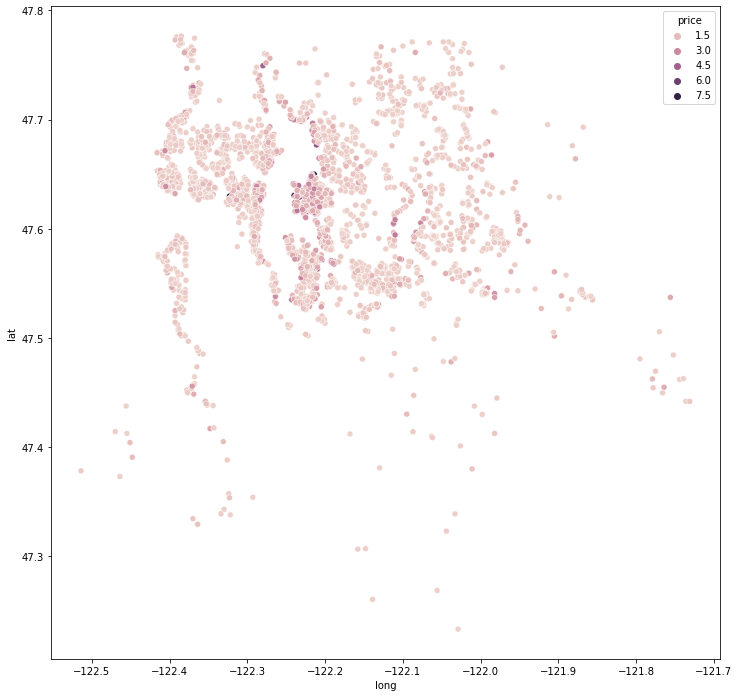

In [127]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=target_df,
               hue='price');

In [128]:
target_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
count,3.000000e+03,3000.000000,3000.00000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.203345e+06,3.966667,2.89775,3372.903000,2.289503e+04,1.763000,2822.596333,1973.708333,170.004667,98070.790667,47.619777,-122.210106,2843.929333,17315.756000,550.306667,6.290333,0.037333,2.457000
std,5.484658e+05,0.886840,0.83332,1092.722341,6.061375e+04,0.484158,1040.455704,32.524594,557.882106,53.376804,0.066990,0.125036,820.043668,37247.324103,631.849823,1.215126,0.189609,0.692082
min,8.000000e+05,1.000000,1.00000,1050.000000,6.090000e+02,1.000000,710.000000,1900.000000,0.000000,98001.000000,47.233200,-122.514000,900.000000,977.000000,0.000000,3.000000,0.000000,0.000000
25%,8.750000e+05,3.000000,2.50000,2650.000000,6.000000e+03,1.500000,2010.000000,1951.000000,0.000000,98029.000000,47.572350,-122.303000,2230.000000,5777.250000,0.000000,5.000000,0.000000,2.000000
50%,9.986500e+05,4.000000,2.75000,3240.000000,9.690500e+03,2.000000,2700.000000,1983.000000,0.000000,98065.000000,47.628700,-122.214000,2830.000000,9490.000000,355.000000,6.000000,0.000000,2.000000
75%,1.320000e+06,4.000000,3.50000,3920.000000,1.667500e+04,2.000000,3480.000000,2001.250000,0.000000,98112.000000,47.665100,-122.122750,3390.000000,14841.250000,1000.000000,7.000000,0.000000,3.000000
max,7.700000e+06,10.000000,8.00000,13540.000000,1.024068e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.776400,-121.731000,6210.000000,871200.000000,4820.000000,10.000000,1.000000,4.000000


In [129]:
relevant_columns = [    
 'bedrooms',    
 'bathrooms',  
 'sqft_living',  
 'sqft_lot',    
 'floors',    
 'waterfront', 
 'condition',
 'grades',
 'sqft_above',
 'sqft_basment_calc',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15'
]

In [130]:
y = target_df['price']
X = target_df.loc[:, relevant_columns]

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [132]:
X_train = X_train.loc[:, relevant_columns]

# Visually inspect X_train
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grades,sqft_above,sqft_basment_calc,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21155,4,2.50,2580,3436,2.0,0.0,2.0,5.0,2580,0,2013,0.0,98033,47.6853,-122.210,1780,5772
2464,4,2.50,3160,4620,1.5,0.0,2.0,6.0,2020,1140,1917,0.0,98116,47.5875,-122.382,2790,5308
8042,4,2.50,4120,14866,1.0,1.0,2.0,5.0,2070,2050,1965,0.0,98006,47.5571,-122.193,3620,19729
11578,4,2.75,3020,8622,2.0,0.0,2.0,6.0,3020,0,1976,2003.0,98004,47.5866,-122.201,3060,14303
5303,4,2.50,3400,35062,2.0,0.0,3.0,8.0,3400,0,1988,0.0,98052,47.7168,-122.113,2880,9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,2.75,3240,7200,1.0,0.0,2.0,5.0,1620,1620,1960,0.0,98118,47.5670,-122.273,2700,7200
8023,5,4.50,3820,5750,2.0,0.0,2.0,6.0,2830,990,2000,0.0,98116,47.5581,-122.385,1750,5750
8371,4,2.50,3530,49222,2.0,0.0,3.0,6.0,3530,0,1986,0.0,98072,47.7285,-122.112,3750,49222
9657,4,3.25,4060,20822,2.0,0.0,2.0,7.0,4060,0,1991,0.0,98077,47.7213,-122.055,4170,23958


In [133]:
model = LinearRegression()
model.fit(X_train, y_train)

cross_val_score(model, X_train, y_train, cv=3)

array([0.58227253, 0.5673251 , 0.5804063 ])

In [134]:
X_test = X_test.loc[:, relevant_columns]

In [135]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5687714073684639

In [136]:
target_reg = sm.OLS(y, sm.add_constant(X)).fit()

target_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     261.7
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:26:05   Log-Likelihood:                -42586.
No. Observations:                3000   AIC:                         8.521e+04
Df Residuals:                    2983   BIC:                         8.531e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.833e+07   1.48e+07      1.242      0.214   -1.06e+07    4.73e+07
bedrooms          -4.556e+04   8586.328     -5.306      0.000   -6.24e+04   -2.87e+04
bathrooms          7.344e+04   1.24e+04      5.937      0.000    4.92e+04    9.77e+04
sqft_living         157.9654      7.373     21.425      0.000     143.509     172.422
sqft_lot              0.3417      0.158      2.159      0.031       0.031       0.652
floors            -6.953e+04   1.71e+04     -4.066      0.000   -1.03e+05    -3.6e+04
waterfront         7.878e+05   3.52e+04     22.394      0.000    7.19e+05    8.57e+05
condition          2.457e+04   1.14e+04      2.159      0.031    2260.246    4.69e+04
grades             9.936e+04   8584.710     11.574      0.000    8.25e+04    1.16e+05
sqft_above          115.6142      7.676     15.062      0.000     100.563     130.665
sqft_basment_calc    42.3374      8.506      4.978      0.000      25.660      59.015
yr_built          -3042.2233    304.692     -9.985      0.000   -3639.651   -2444.795
yr_renovated         19.5906     13.002      1.507      0.132      -5.904      45.085
zipcode           -2877.8600    162.531    -17.707      0.000   -3196.543   -2559.177
lat                7.828e+05   1.02e+05      7.675      0.000    5.83e+05    9.83e+05
long                -1.9e+06   8.47e+04    -22.421      0.000   -2.07e+06   -1.73e+06
sqft_living15        48.2030     11.200      4.304      0.000      26.242      70.164
sqft_lot15           -0.7197      0.255     -2.819      0.005      -1.220      -0.219
==============================================================================
Omnibus:                     1179.785   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13051.636
Skew:                           1.548   Prob(JB):                         0.00
Kurtosis:                      12.738   Cond. No.                     4.73e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [140]:
lr = RandomForestRegressor(n_estimators=15)
lr.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.72


In [137]:
target_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
price,1.000000,0.169659,0.441925,0.575890,0.022978,0.103287,0.432505,0.018704,0.071188,-0.072875,-0.015036,-0.089543,0.302488,0.028290,0.283747,0.459427,0.311323,0.016763
bedrooms,0.169659,1.000000,0.433274,0.414116,-0.008690,0.140407,0.314029,0.087810,-0.020714,-0.116727,-0.030935,0.103961,0.183121,-0.001514,0.199067,0.175455,-0.089763,-0.028413
bathrooms,0.441925,0.433274,1.000000,0.729861,0.130222,0.315338,0.612710,0.383850,0.017812,-0.101519,-0.096175,0.210328,0.326366,0.147103,0.253285,0.551266,0.035775,-0.206588
sqft_living,0.575890,0.414116,0.729861,1.000000,0.204131,0.274758,0.825626,0.373020,-0.054729,-0.177927,-0.113375,0.323079,0.540148,0.234031,0.369859,0.687165,0.060034,-0.177335
sqft_lot,0.022978,-0.008690,0.130222,0.204131,1.000000,0.024535,0.230550,0.135855,-0.039058,-0.117702,-0.134494,0.325284,0.069078,0.715591,-0.026617,0.156817,0.007567,-0.079753
floors,0.103287,0.140407,0.315338,0.274758,0.024535,1.000000,0.485767,0.260964,-0.042075,0.092728,0.018930,0.080971,0.067695,0.015467,-0.324736,0.341444,-0.010737,-0.241391
sqft_above,0.432505,0.314029,0.612710,0.825626,0.230550,0.485767,1.000000,0.485165,-0.114645,-0.236230,-0.082192,0.463817,0.524069,0.253643,-0.218843,0.701909,0.006739,-0.303868
yr_built,0.018704,0.087810,0.383850,0.373020,0.135855,0.260964,0.485165,1.000000,-0.302115,-0.381317,-0.098839,0.530041,0.307638,0.153913,-0.153810,0.481376,-0.038516,-0.468801
yr_renovated,0.071188,-0.020714,0.017812,-0.054729,-0.039058,-0.042075,-0.114645,-0.302115,1.000000,0.127927,-0.003372,-0.183327,-0.122026,-0.038530,0.094136,-0.118977,0.084142,-0.101783
zipcode,-0.072875,-0.116727,-0.101519,-0.177927,-0.117702,0.092728,-0.236230,-0.381317,0.127927,1.000000,0.215109,-0.612649,-0.325799,-0.140384,0.081288,-0.180032,0.073519,0.092340
